# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
import random


## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

In [2]:
# your solution

I will use the breast cancer wisconsin dataset!

In [3]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
y = data.target
X = data.data

In [4]:
from scipy.stats.stats import pearsonr
from itertools import combinations
#grow each tree on a bootstrap sample

def draw_average_correlation(clf,X,y,label,param_range=np.arange(1, 21, 1),color='r'):
    average_correlations = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    for n in range(80):
        correlation = []
        for p in param_range:
            correlations = []
            #clf = Classifier(max_features=p,bootstrap=boostrap,random_state=21+n)
            clf.max_features=p
            clf.random_state=21+n
            clf.fit(X_train,y_train)
            for i in combinations(clf.estimators_,2):
                correlations.append(pearsonr(i[0].predict(X_test),i[1].predict(X_test))[0])
            correlation.append(np.mean(correlations))
          
        average_correlations.append(correlation)   
        plt.plot(param_range, correlation, c=color, alpha=0.02)
    
    plt.plot(param_range, np.array(average_correlations).mean(axis=0), label=label, c=color, lw=4)         

I use a Random Forest Classifier and an Extra Trees Classifier and I compare the average correlations between the trees of the ensemble varying the maximum number of random chosen features for each tree and comparing for both with boostrapped data and not. For the Forest classifier the average amount of correlation is expected to be smaller when the trees are grown with bootstrapped subset of data.

In the a Random Forest Classifier the split at each nodes is chosen to be the best among the the randomly selected features in each tree while for an Extra Trees Classifier the split is random for each chosen features and the best one is selected. For this reason the average amount of correlation shoudl be smaller for Extra Trees than for a Forest without bootstrap.

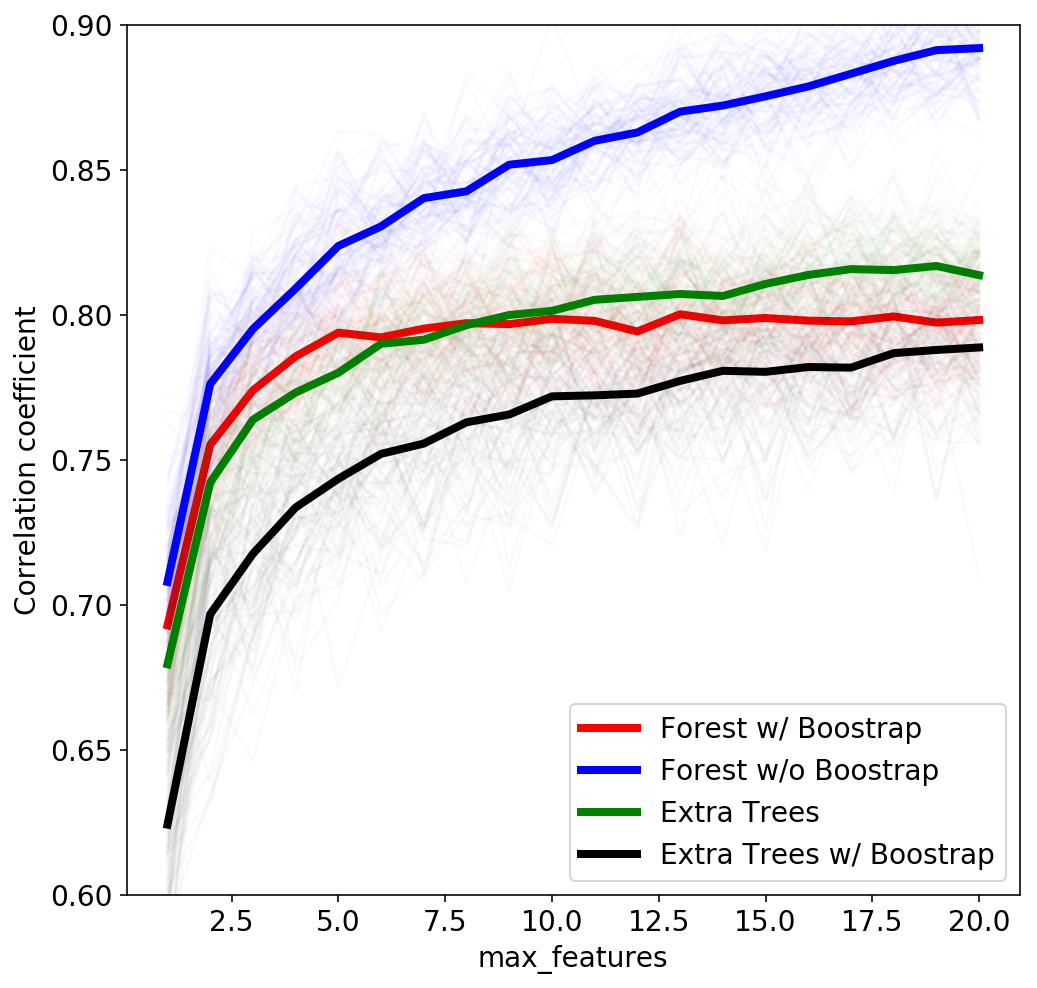

In [5]:
draw_average_correlation(RandomForestClassifier(),X,y,color='r',label='Forest w/ Boostrap')
draw_average_correlation(RandomForestClassifier(bootstrap=False),X,y,color='b',label='Forest w/o Boostrap')
draw_average_correlation(ExtraTreesClassifier(),X,y,color='g',label='Extra Trees')
draw_average_correlation(ExtraTreesClassifier(bootstrap=True),X,y,color='k',label='Extra Trees w/ Boostrap')
plt.xlabel('max_features')
plt.ylabel('Correlation coefficient')
plt.legend(loc='best')
plt.ylim((0.60, 0.9));

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

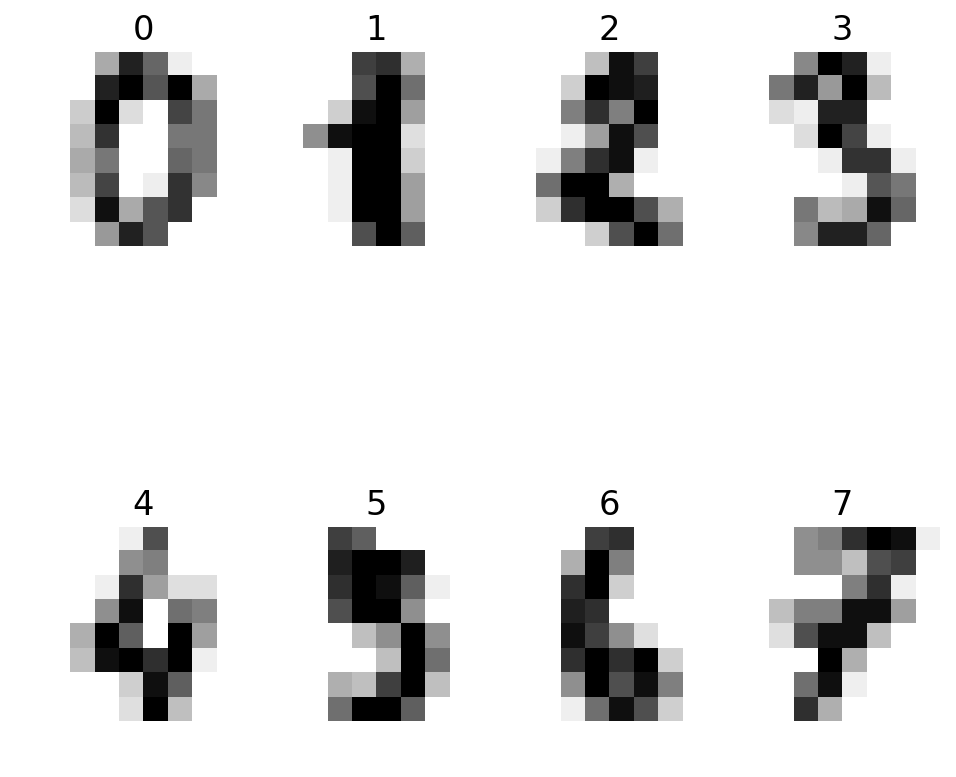

In [6]:
# your answer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target
X = digits.data

images_and_labels = list(zip(digits.images, y))
for index, (image, label) in enumerate(images_and_labels[0:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,150,200,250,300,350,400]}
RFC = RandomForestClassifier()
grid_search = GridSearchCV(RFC,param_grid).fit(X,y)
RFC_best = grid_search.best_params_.get('n_estimators')

ETC = ExtraTreesClassifier()
grid_search = GridSearchCV(ETC,param_grid).fit(X,y)
ETC_best = grid_search.best_params_.get('n_estimators')

GBC = GradientBoostingClassifier()
grid_search = GridSearchCV(GBC,param_grid).fit(X,y)
GBC_best = grid_search.best_params_.get('n_estimators')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)

rf = RandomForestClassifier(n_estimators=RFC_best)
rf.fit(X_train,y_train)
et = ExtraTreesClassifier(n_estimators=ETC_best)
et.fit(X_train,y_train)
gbrt = GradientBoostingClassifier(n_estimators=GBC_best)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=350, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

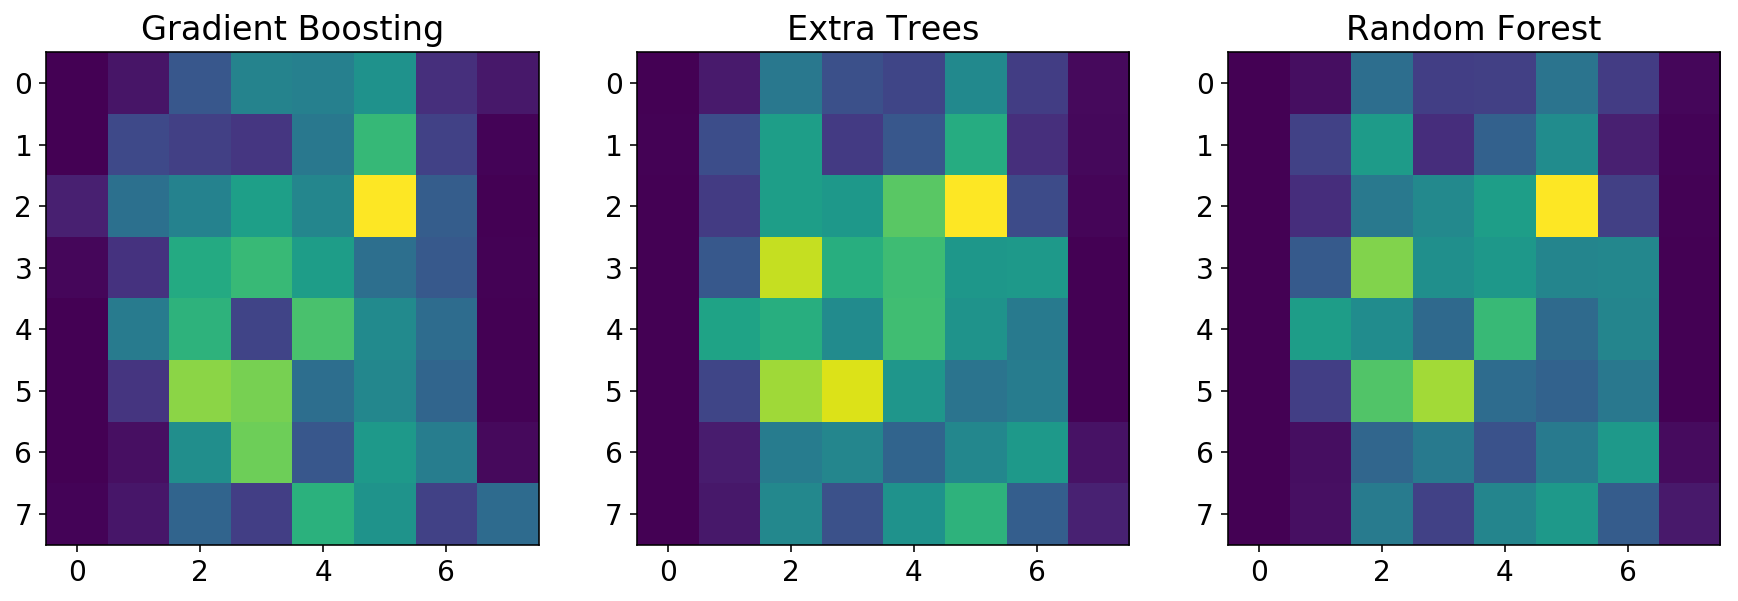

In [8]:
gbrt_feats = gbrt.feature_importances_.reshape(8,8)
et_feats = et.feature_importances_.reshape(8,8)
rf_feats = rf.feature_importances_.reshape(8,8)

f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(gbrt_feats, interpolation='none')
axs[0].set_title('Gradient Boosting')
axs[1].imshow(et_feats, interpolation='none')
axs[1].set_title('Extra Trees')
axs[2].imshow(rf_feats, interpolation='none')
axs[2].set_title('Random Forest')

Here we see that for the tree classifiers, the most important part of the images is the pixel [2,5] and a bit less important around [5,2]. Now let's take a few random images in the test sample and check the classifiers predictions.


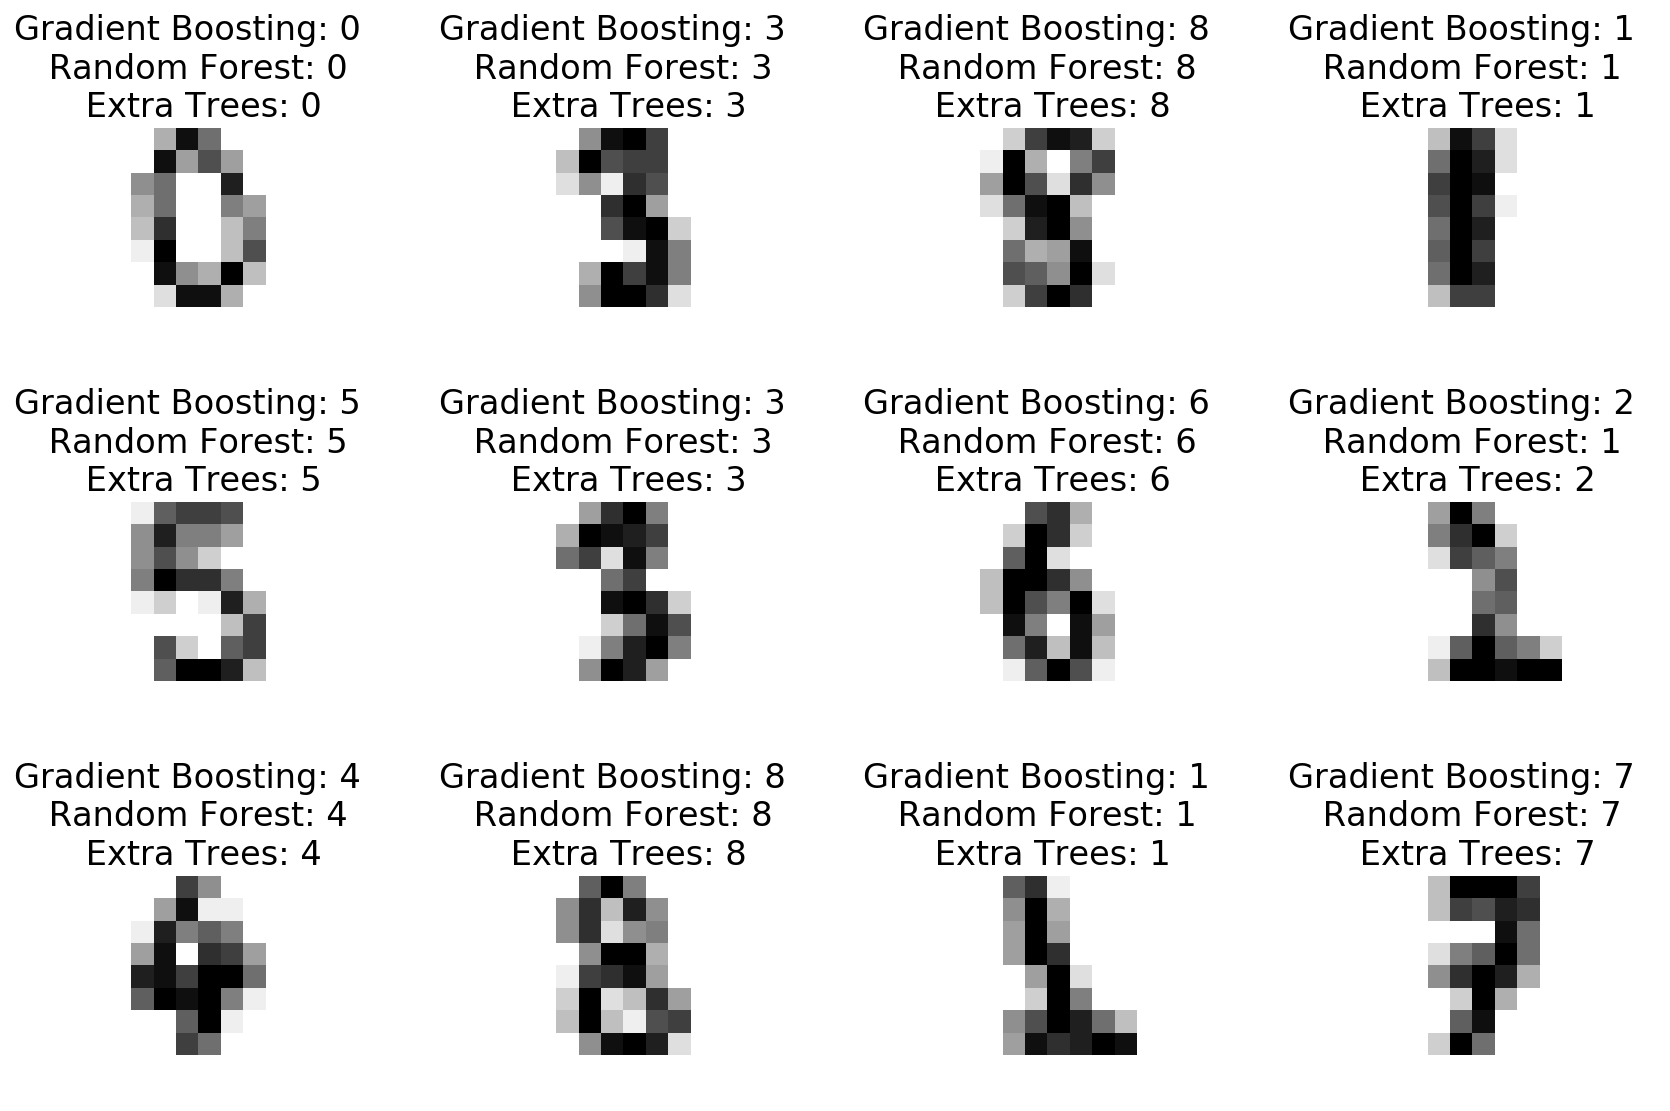

In [9]:
gbrt_predicted = gbrt.predict(X_test)
rf_predicted = rf.predict(X_test)
et_predicted = et.predict(X_test)

def random_index(length=4):
    random_index = []
    while len(random_index) < length:
        index = random.randint(0, len(X_test)-1)
        if index in random_index:
            continue
        else:
            random_index.append(index)
    return random_index

f, axs = plt.subplots(3,4,figsize=(12,8))

for i,index in enumerate(random_index(12)):
    axe = axs.reshape(1,12)[0,i]
    image = X_test[index]
    image.shape = (8,8)
    axe.axis('off')
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axe.set_title('Gradient Boosting: {0}  \n Random Forest: {1} \n Extra Trees: {2}'.format(gbrt_predicted[index],rf_predicted[index],et_predicted[index]))    
f.tight_layout()

We see that the classifiers predict quite well the the digits from the images and I agree most of the time with these predictions (There are few cases were even me I'm not sure what digit is written, and for some of these cases the classifiers do not agree together).

### BONUS

Let's change the problem to a classification between odd and even objects.

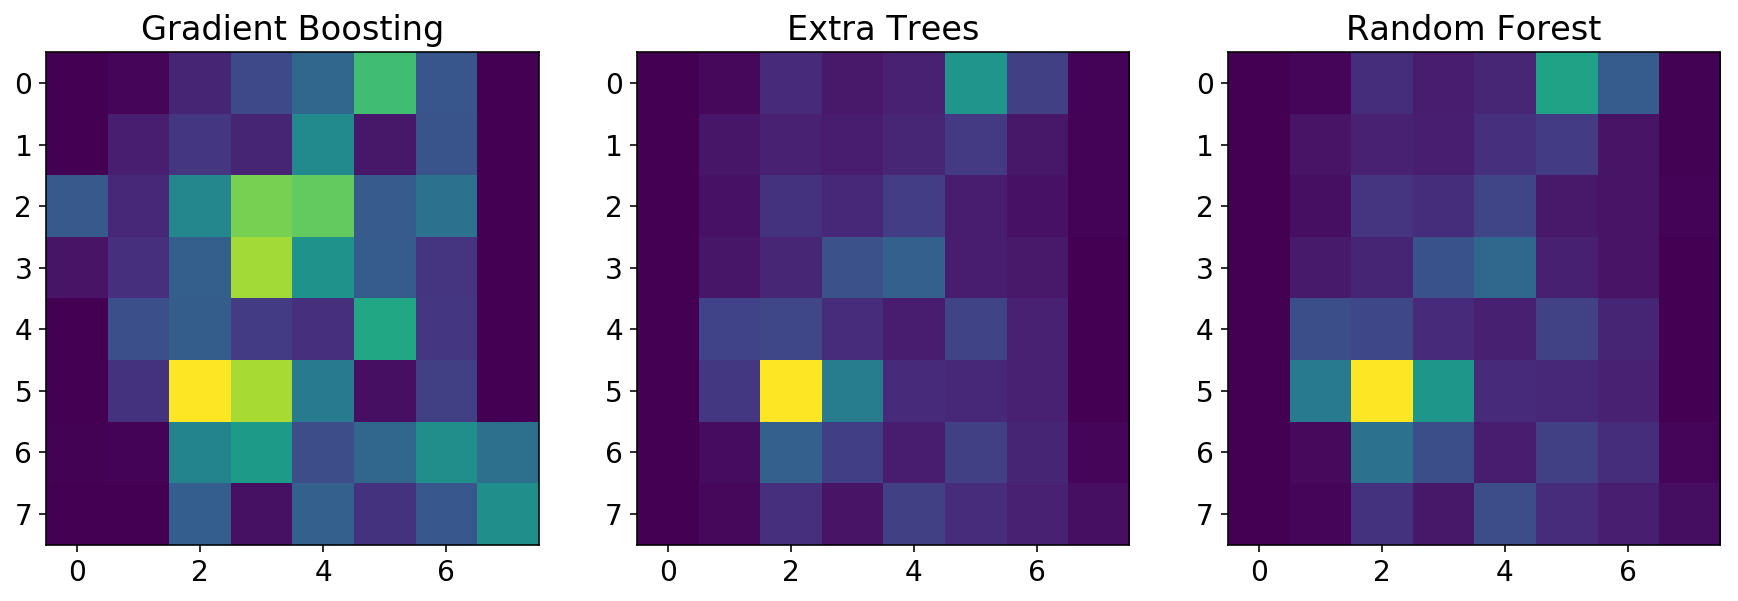

In [10]:
labels = ["odd", "even"]
y = digits.target
X = digits.data

y = np.take(labels, (y % 2 == 0))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

rf = RandomForestClassifier(n_estimators=RFC_best)
rf.fit(X_train,y_train)
et = ExtraTreesClassifier(n_estimators=ETC_best)
et.fit(X_train,y_train)
gbrt = GradientBoostingClassifier(n_estimators=GBC_best)
gbrt.fit(X_train,y_train)

gbrt_feats = gbrt.feature_importances_.reshape(8,8)
et_feats = et.feature_importances_.reshape(8,8)
rf_feats = rf.feature_importances_.reshape(8,8)

f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(gbrt_feats, interpolation='none')
axs[0].set_title('Gradient Boosting')
axs[1].imshow(et_feats, interpolation='none')
axs[1].set_title('Extra Trees')
axs[2].imshow(rf_feats, interpolation='none')
axs[2].set_title('Random Forest')


We now see that indeed the importances change if now the problem is to classify even from odd digits, the most important pixel is now [5,2] (and not anymore [2,5]). I'm showing again the predictions of each classifier, same comments as previously.

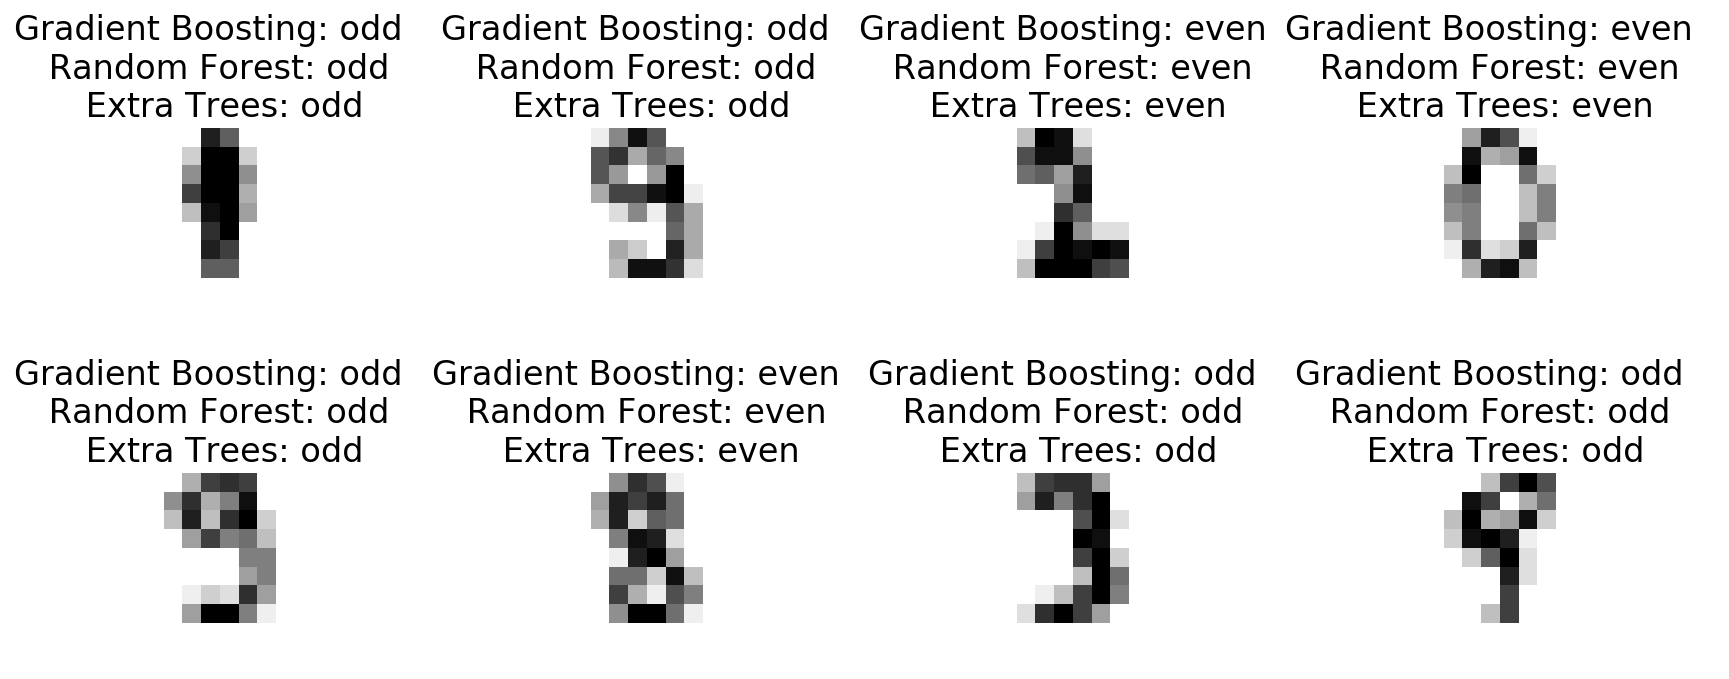

In [11]:
gbrt_predicted = gbrt.predict(X_test)
rf_predicted = rf.predict(X_test)
et_predicted = et.predict(X_test)

f, axs = plt.subplots(2,4,figsize=(12,5))

for i,index in enumerate(random_index(8)):
    axe = axs.reshape(1,8)[0,i]
    image = X_test[index]
    image.shape = (8,8)
    axe.axis('off')
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axe.set_title('Gradient Boosting: {0}  \n Random Forest: {1} \n Extra Trees: {2}'.format(gbrt_predicted[index],rf_predicted[index],et_predicted[index]))    
f.tight_layout()

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [12]:
from sklearn.ensemble import GradientBoostingRegressor


def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [13]:
# your solution

GBR = GradientBoostingRegressor(n_estimators=3000)

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [2,3,4,5,6],
              'n_estimators': [100,150,200,250,300,350,400,500]}
grid_search = GridSearchCV(GBR,param_grid).fit(X,y)
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [14]:
GBR = GradientBoostingRegressor(max_depth=2)

#param_grid = {'learning_rate': [0.2, 0.1],
#              'n_estimators': [100,150,200,250,300,350,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,3000,3200,5000,6000,10000]}
#grid_search = GridSearchCV(GBR,param_grid).fit(X,y)
#print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 6000}


From the function `make_data` we see that there is 8 features and the output is only dependant for the first 5 of them so the others are totally uninformative. This is shown below where the features importances are shown from the Gradient Boosting Regressor and we see that indeed X_5 X_6 and X_7 have very low importances.

In [17]:
rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
rgr.fit(X_train,y_train)

feature_names = []
for i,fi in enumerate(rgr.feature_importances_):
    print("X_{0} importance: ".format(i), round(fi,3))
    feature_names.append("X_{0}".format(i))


X_0 importance:  0.154
X_1 importance:  0.147
X_2 importance:  0.232
X_3 importance:  0.184
X_4 importance:  0.181
X_5 importance:  0.026
X_6 importance:  0.034
X_7 importance:  0.044


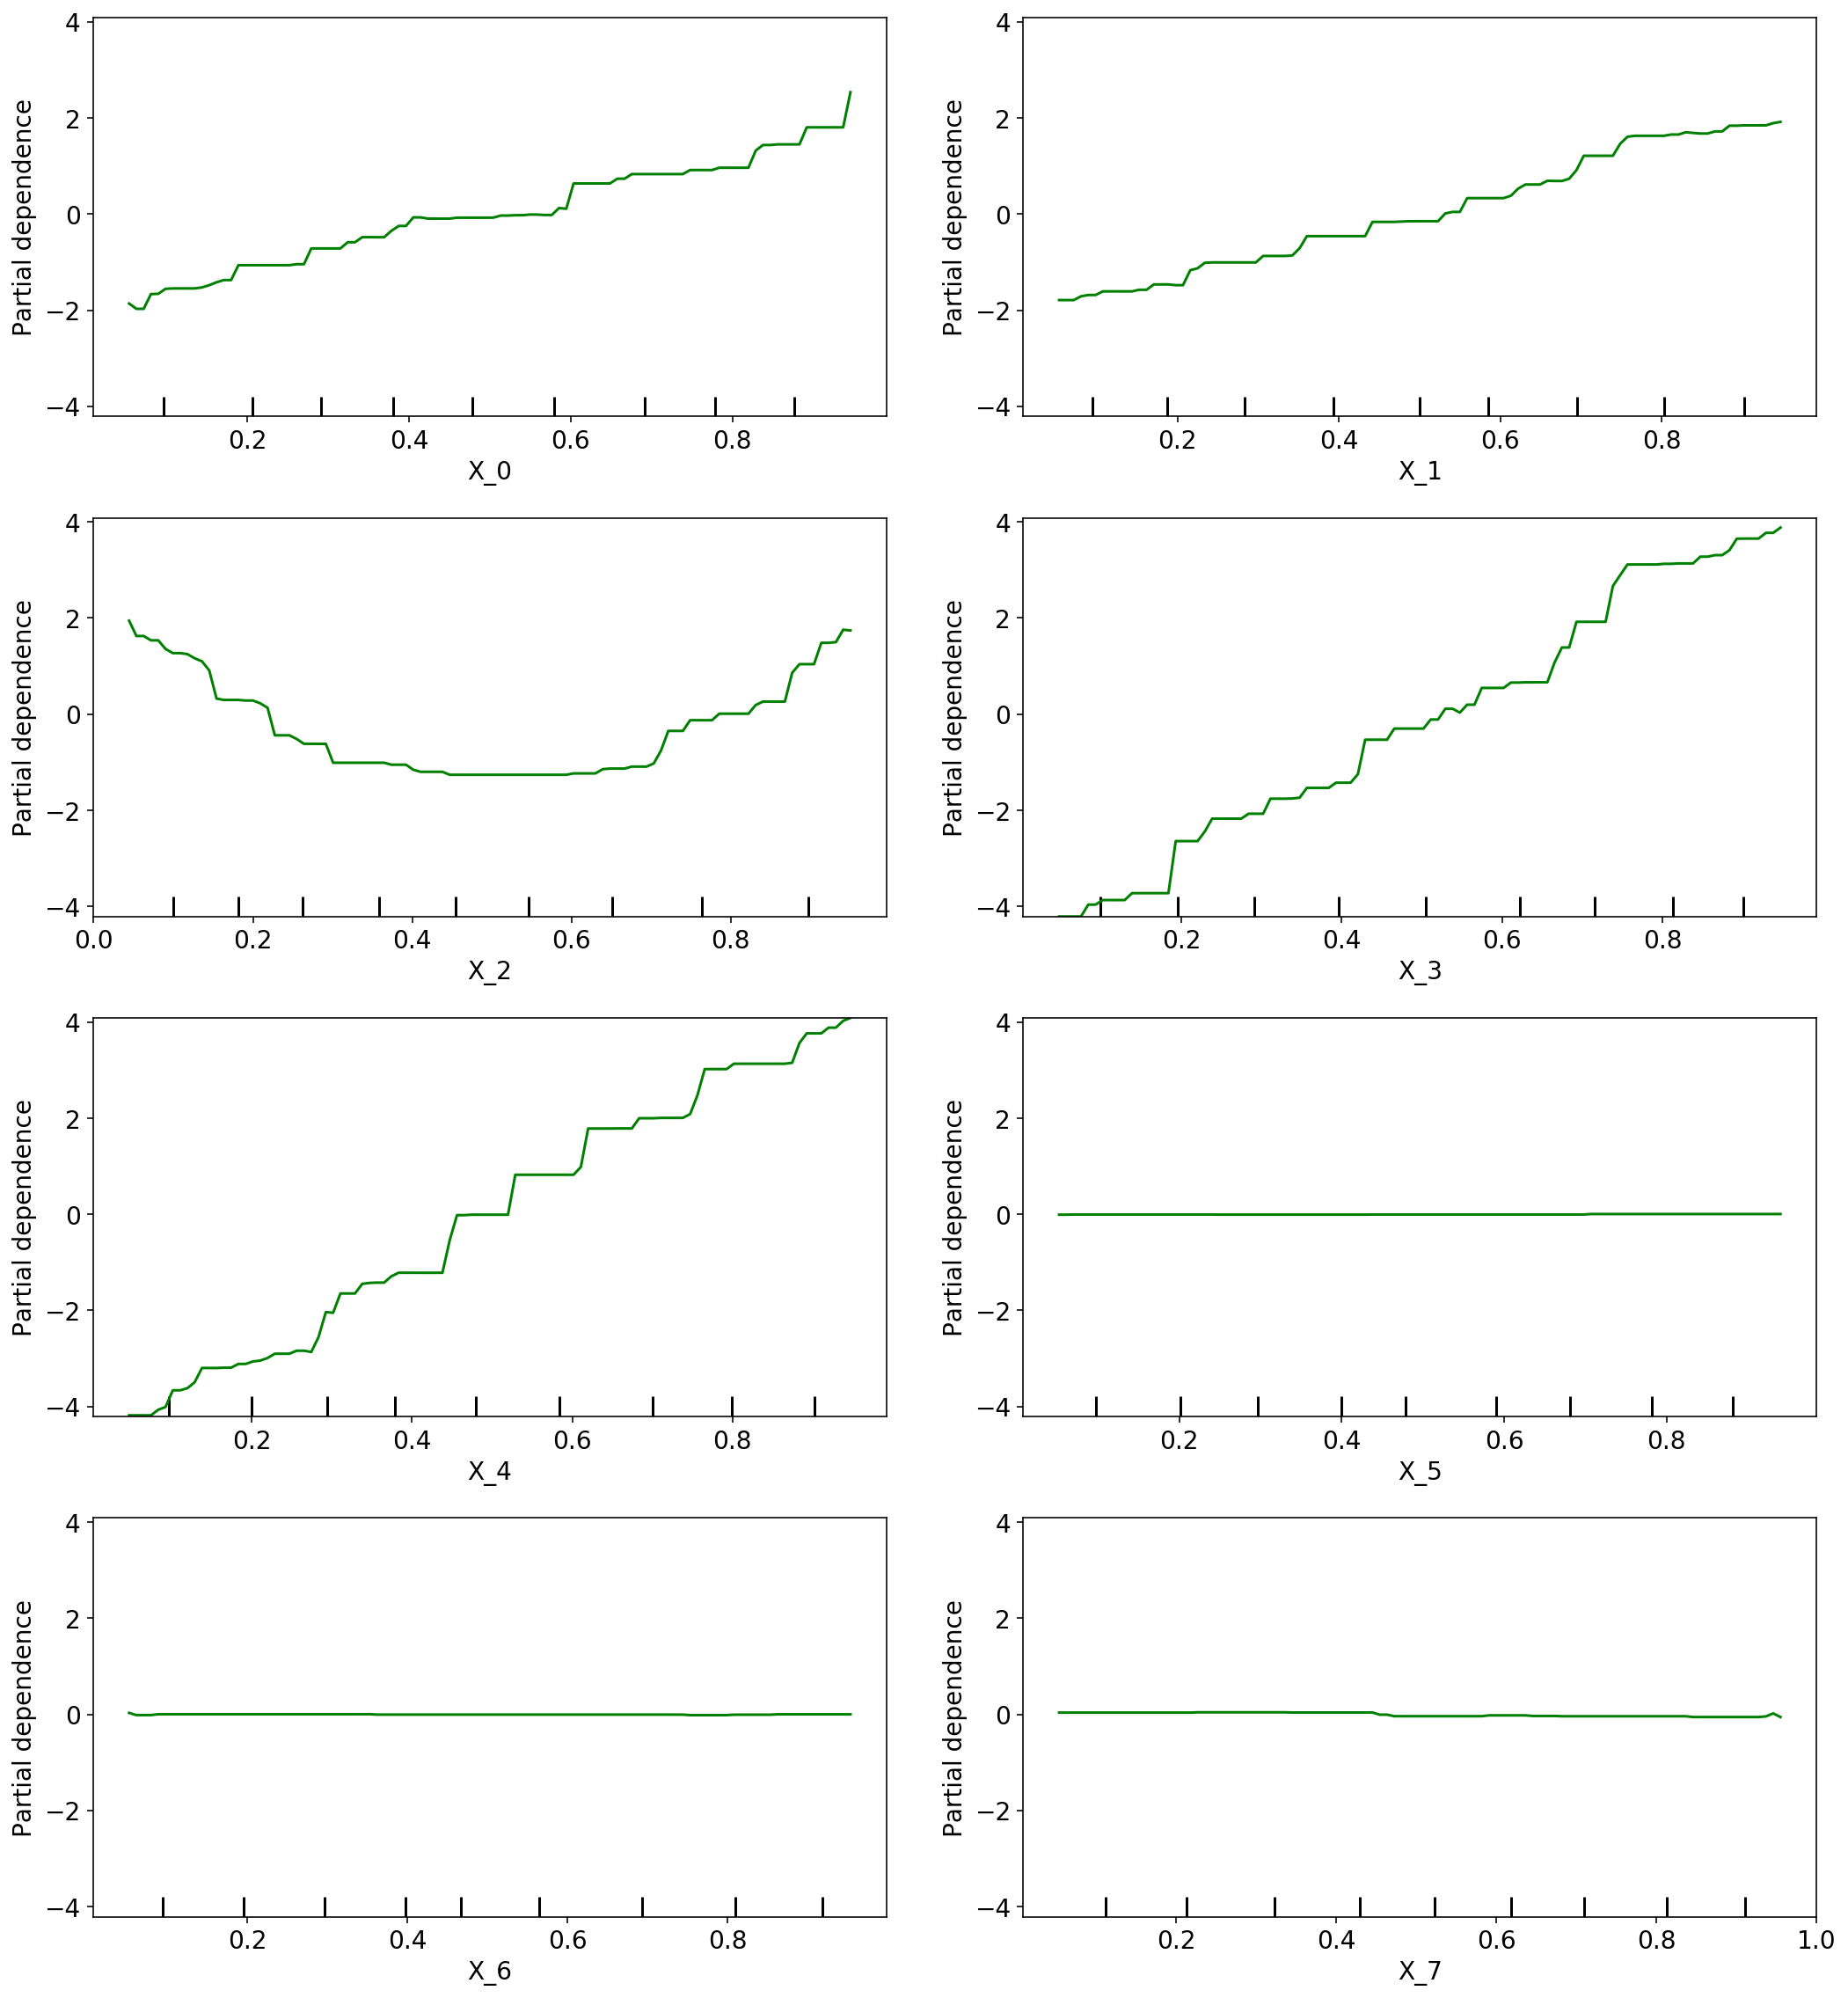

In [18]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(rgr, X, features=[0,1,2,3,4,5,6,7], feature_names=feature_names,
                        figsize=(15,16), n_cols=2);
plt.tight_layout();

Here are show the partial dependences of the classifier output for each features. For X_5, X_6 and X_7 it is flat as expected but the others the dependences are the same as the relation between the target y and the features X_...

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [23]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

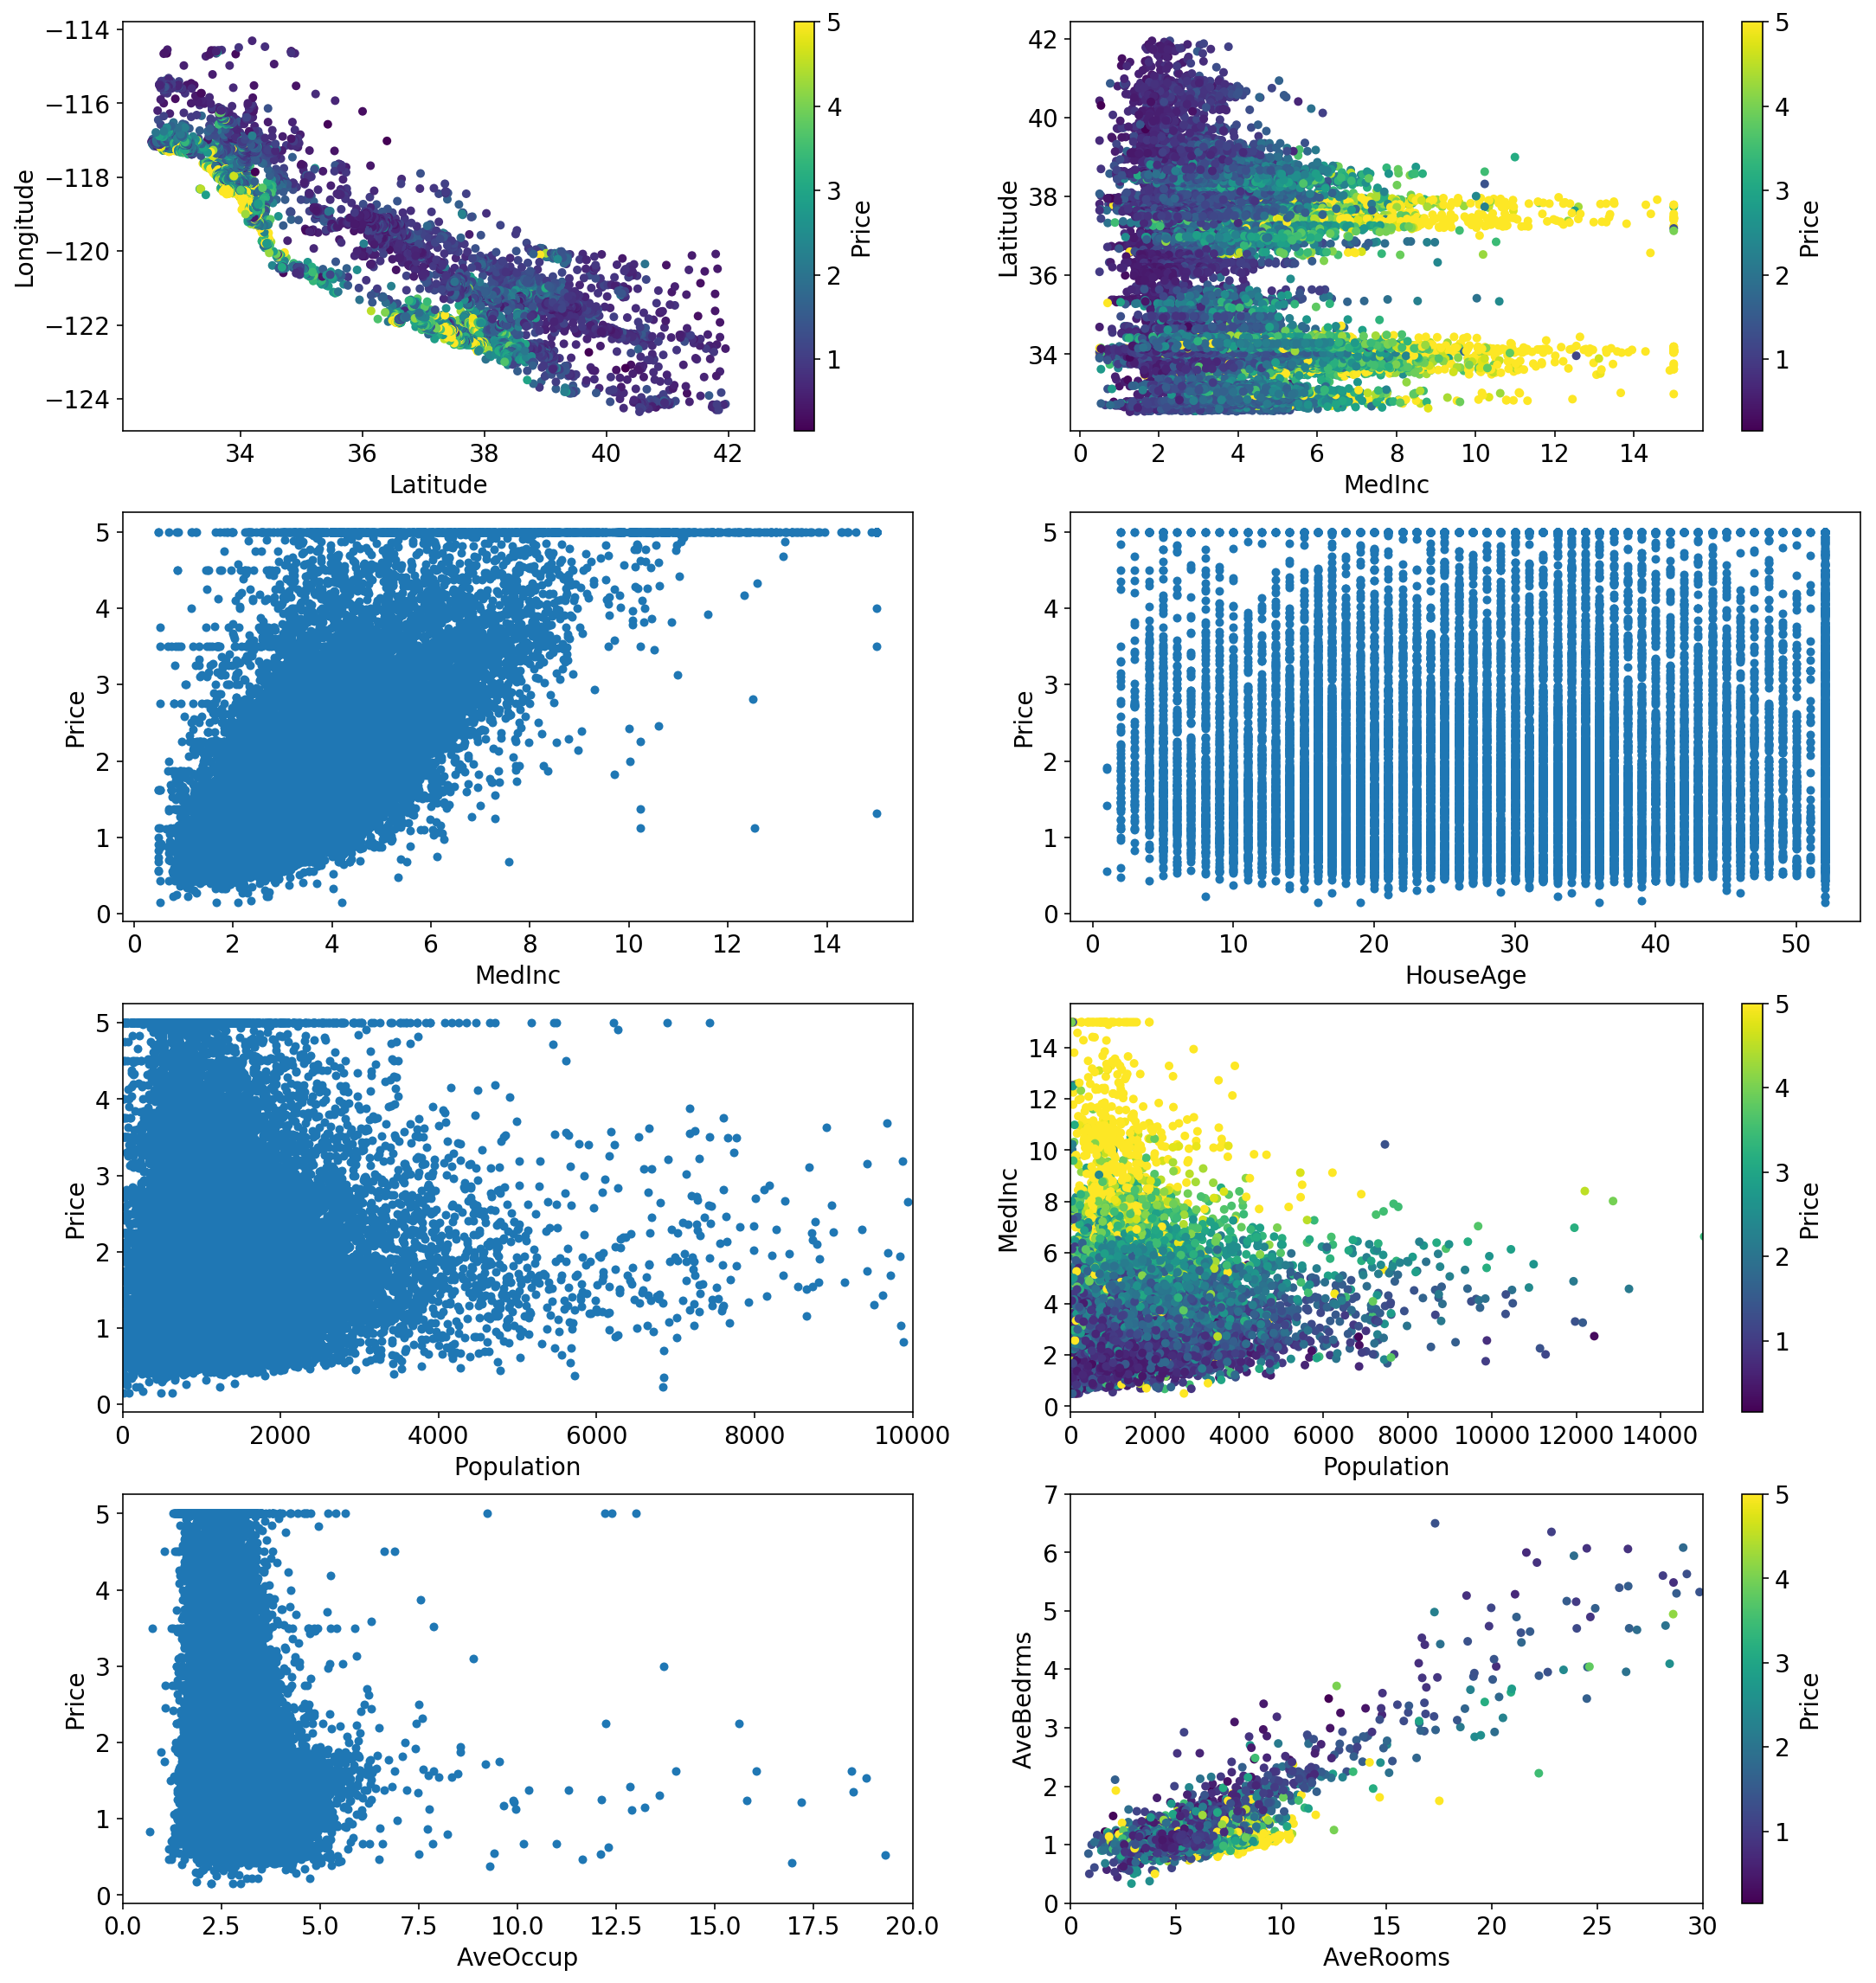

In [24]:
# your solution
X = cal_housing.data
y = cal_housing.target
names = cal_housing.feature_names

plt.rcParams["figure.figsize"] = (18, 20)
f, axarr = plt.subplots(4, 2)

sc = axarr[0,0].scatter(X[:, 6], X[:, 7], c=y, lw=0, s=25)
axarr[0,0].set_xlabel(names[6])
axarr[0,0].set_ylabel(names[7])
cbar = f.colorbar(sc,ax=axarr[0,0])
cbar.ax.set_ylabel("Price")

sc = axarr[0,1].scatter(X[:, 0], X[:, 6], c=y, lw=0, s=25)
axarr[0,1].set_xlabel(names[0])
axarr[0,1].set_ylabel(names[6])
cbar = f.colorbar(sc,ax=axarr[0,1])
cbar.ax.set_ylabel("Price")

axarr[1,0].scatter(X[:, 0], y, lw=0, s=25)
axarr[1,0].set_xlabel(names[0])
axarr[1,0].set_ylabel("Price")

axarr[1,1].scatter(X[:, 1], y, lw=0, s=25)
axarr[1,1].set_xlabel(names[1])
axarr[1,1].set_ylabel("Price")

axarr[2,0].scatter(X[:, 4], y, lw=0, s=25)
axarr[2,0].set_xlabel(names[4])
axarr[2,0].set_ylabel("Price")
axarr[2,0].set_xlim(0,10000)

sc = axarr[2,1].scatter(X[:, 4], X[:, 0], c=y, lw=0, s=25)
axarr[2,1].set_xlabel(names[4])
axarr[2,1].set_ylabel(names[0])
cbar = f.colorbar(sc,ax=axarr[2,1])
axarr[2,1].set_xlim(0,15000)
cbar.ax.set_ylabel("Price")

axarr[3,0].scatter(X[:, 5], y, lw=0, s=25)
axarr[3,0].set_xlabel(names[5])
axarr[3,0].set_ylabel("Price")
axarr[3,0].set_xlim(0,20)

sc = axarr[3,1].scatter(X[:, 2], X[:, 3], c=y, lw=0, s=25)
axarr[3,1].set_xlabel(names[2])
axarr[3,1].set_ylabel(names[3])
cbar = f.colorbar(sc,ax=axarr[3,1])
axarr[3,1].set_ylim(0,7)
axarr[3,1].set_xlim(0,30)
cbar.ax.set_ylabel("Price")
plt.show()

Here are the plots for each features with the housing prices, we see that the most discriminatives features between low and high housing prices will be the localization, we that the most expensive houses are around (34,-118) and (37,-122) which is where there are also the higher median incomes, the median income and the population density.

Features like the average occupancy and average number of rooms and bedrooms doesn't seem to affect the housing price.

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=3000)

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [1,2,3,4,6],
              'min_samples_leaf': [3,5,10,12,15]
              }
grid_search = GridSearchCV(GBR,param_grid).fit(X,y)
print("Best parameters: ",grid_search.best_params_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

ax = plt.gca()